In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Energy consumption

In [2]:
df_energy = pd.read_csv('data/BitcoinEnergyCambridge.csv')
df_energy["Date"] = pd.to_datetime(df_energy["Date"])
df_energy = df_energy[df_energy["Date"] > "2017-01-01"]
df_energy.head()

,Timestamp,Date,MAX GW,MIN GW,GUESS GW,annualised consumption MAX TWh,annualised consumption MIN TWh,annualised consumption GUESS TWh
2360,1483315200,2017-01-02,1.498434,1.261182,1.373565,13.135274,11.055522,12.040667
2361,1483401600,2017-01-03,1.514614,1.274800,1.388396,13.277109,11.174900,12.170683
2362,1483488000,2017-01-04,1.503239,1.265226,1.377969,13.177394,11.090973,12.079277
2363,1483574400,2017-01-05,1.489409,1.253586,1.365292,13.056162,10.988936,11.968148
2364,1483660800,2017-01-06,1.494941,1.258242,1.370363,13.104653,11.029749,12.012598


In [3]:
df_energy_clean = df_energy[["Date", "GUESS GW"]]
df_energy_clean.rename(columns={'GUESS GW': 'Energy GW'}, inplace=True)
df_energy_clean

C:\Users\timma\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,Energy GW
2360,2017-01-02,1.373565
2361,2017-01-03,1.388396
2362,2017-01-04,1.377969
2363,2017-01-05,1.365292
2364,2017-01-06,1.370363
...,...,...
4146,2021-11-23,12.969188
4147,2021-11-24,13.075058
4148,2021-11-25,12.889783
4149,2021-11-26,12.823610


In [4]:
# check if data frame is complete
df_energy_clean.isna().sum()

Date         0
Energy GW    0
dtype: int64

In [15]:
sns.set(font_scale=1.5, rc={'text.usetex': True})
sns.set_style("whitegrid")

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

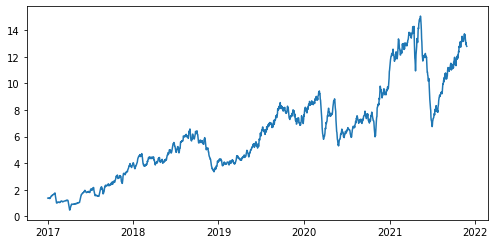

In [10]:
x = df_energy_clean['Date']
y = df_energy_clean['Energy GW']
plt.plot(x, y)

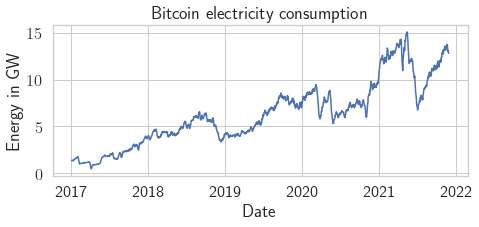

In [17]:
# plt.rcParams["figure.figsize"] = [7.00, 3.50] 
plt.rcParams["figure.autolayout"] = True

ax = sns.lineplot(x="Date", y="Energy GW", data=df_energy_clean)
# plt.xticks(rotation=15)
plt.title('Bitcoin electricity consumption')
ax.set(xlabel='Date', ylabel='Energy in GW')
plt.savefig('images/energy.png', dpi=400)
plt.show()
plt.close()

# Bitcoin prices

In [35]:
df_bitcoin = pd.read_csv("data/Bitcoin USD (BTC-USD).csv")
df_bitcoin["Date"] = pd.to_datetime(df_bitcoin["Date"])
df_bitcoin_clean = df_bitcoin[["Date", "Close", "Volume"]]
df_bitcoin_clean.rename(columns={'Close': 'BTC Price', 'Volume': 'BTC Volume'}, inplace=True)
df_bitcoin_clean

C:\Users\timma\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Date,BTC Price,BTC Volume
0,2014-09-17,457.334015,2.105680e+07
1,2014-09-18,424.440002,3.448320e+07
2,2014-09-19,394.795990,3.791970e+07
3,2014-09-20,408.903992,3.686360e+07
4,2014-09-21,398.821014,2.658010e+07
...,...,...,...
2608,2021-11-07,63326.988281,2.472675e+10
2609,2021-11-08,67566.828125,4.112561e+10
2610,2021-11-09,66971.828125,4.235799e+10
2611,2021-11-10,64995.230469,4.873083e+10


In [36]:
# check if data frame is complete
df_bitcoin_clean.isna().sum()

Date          0
BTC Price     4
BTC Volume    4
dtype: int64

In [37]:
# interpolate
df_bitcoin_clean = df_bitcoin_clean.interpolate()
df_bitcoin_clean.isna().sum()

Date          0
BTC Price     0
BTC Volume    0
dtype: int64

# S&P index

In [74]:
df_sp = pd.read_csv("data/US_S&P US_SPX.csv", sep=';')
df_sp["Date"] = pd.to_datetime(df_sp["Date"], format = "%d.%m.%Y")
df_sp = df_sp[["Date", "Close"]]
df_sp.rename(columns={'Close': 'S&P'}, inplace=True)
df_sp["S&P"] = [float(str(i).replace(",", "")) for i in df_sp["S&P"]]
df_sp["S&P"].astype(float)
df_sp

,Date,S&P
0,2021-12-08,4701.21
1,2021-12-07,4686.75
2,2021-12-06,4591.67
3,2021-12-03,4538.43
4,2021-12-02,4577.10
...,...,...
1238,2017-01-09,2268.90
1239,2017-01-06,2276.98
1240,2017-01-05,2269.00
1241,2017-01-04,2270.75


# Fear and greed index

In [39]:
df_fear = pd.read_csv("data/fear.alternative.me.csv")
df_fear["date"] = pd.to_datetime(df_fear["date"])
df_fear.rename(columns={'date': 'Date', 'fng_value': 'Fear Index', 'fng_classification': 'Fear Classification'}, inplace=True)
df_fear

,Date,Fear Index,Fear Classification
0,2021-11-28,27,Fear
1,2021-11-27,21,Extreme Fear
2,2021-11-26,47,Neutral
3,2021-11-25,32,Fear
4,2021-11-24,42,Fear
...,...,...,...
1389,2018-02-05,11,Extreme Fear
1390,2018-02-04,24,Extreme Fear
1391,2018-02-03,40,Fear
1392,2018-02-02,15,Extreme Fear


In [40]:
df_fear.isna().sum()

Date                   0
Fear Index             0
Fear Classification    0
dtype: int64

# Electricity prices

In [84]:
df_electricityPrices = pd.read_csv("data/NY_electricity_prices.csv")
df_electricityPrices.rename(columns={'HOURBEGINNING_TIME': 'Date', 'ZoneJ_NYC': 'Electricity Price NY'}, inplace=True)
df_electricityPrices["Date"] = pd.to_datetime(df_electricityPrices["Date"])
df_electricityPrices["Electricity Price NY"] = [float(str(i).replace("$", "")) for i in df_electricityPrices["Electricity Price NY"]]
df_electricityPrices["Electricity Price NY"].astype(float)
df_electricityPrices

,Date,Electricity Price NY
0,2021-12-07,62.26
1,2021-12-06,38.72
2,2021-12-05,38.54
3,2021-12-04,52.07
4,2021-12-03,55.58
...,...,...
1794,2017-01-05,34.21
1795,2017-01-04,34.41
1796,2017-01-03,36.99
1797,2017-01-02,45.81


In [85]:
df_fear.isna().sum()

Date                   0
Fear Index             0
Fear Classification    0
dtype: int64

# Merge different data sources

In [86]:
df_complete = pd.merge(df_energy_clean, df_bitcoin_clean, how="left")
df_complete = pd.merge(df_complete, df_fear, how="left")
df_complete = pd.merge(df_complete, df_sp, how="left")
df_complete = pd.merge(df_complete, df_electricityPrices, how="left")
df_complete

,Date,Energy GW,BTC Price,BTC Volume,Fear Index,Fear Classification,S&P,Electricity Price NY
0,2017-01-02,1.373565,1021.750000,222184992.0,NaN,NaN,NaN,45.81
1,2017-01-03,1.388396,1043.839966,185168000.0,NaN,NaN,2257.83,36.99
2,2017-01-04,1.377969,1154.729980,344945984.0,NaN,NaN,2270.75,34.41
3,2017-01-05,1.365292,1013.380005,510199008.0,NaN,NaN,2269.00,34.21
4,2017-01-06,1.370363,902.200989,351876000.0,NaN,NaN,2276.98,38.04
...,...,...,...,...,...,...,...,...
1786,2021-11-23,12.969188,NaN,NaN,33.0,Fear,4690.70,49.61
1787,2021-11-24,13.075058,NaN,NaN,42.0,Fear,4701.46,51.48
1788,2021-11-25,12.889783,NaN,NaN,32.0,Fear,NaN,51.47
1789,2021-11-26,12.823610,NaN,NaN,47.0,Neutral,4594.62,55.73


In [87]:
df_complete = df_complete.interpolate()
df_complete

,Date,Energy GW,BTC Price,BTC Volume,Fear Index,Fear Classification,S&P,Electricity Price NY
0,2017-01-02,1.373565,1021.750000,2.221850e+08,NaN,NaN,NaN,45.81
1,2017-01-03,1.388396,1043.839966,1.851680e+08,NaN,NaN,2257.83,36.99
2,2017-01-04,1.377969,1154.729980,3.449460e+08,NaN,NaN,2270.75,34.41
3,2017-01-05,1.365292,1013.380005,5.101990e+08,NaN,NaN,2269.00,34.21
4,2017-01-06,1.370363,902.200989,3.518760e+08,NaN,NaN,2276.98,38.04
...,...,...,...,...,...,...,...,...
1786,2021-11-23,12.969188,64949.960938,3.588063e+10,33.0,Fear,4690.70,49.61
1787,2021-11-24,13.075058,64949.960938,3.588063e+10,42.0,Fear,4701.46,51.48
1788,2021-11-25,12.889783,64949.960938,3.588063e+10,32.0,Fear,4648.04,51.47
1789,2021-11-26,12.823610,64949.960938,3.588063e+10,47.0,Neutral,4594.62,55.73


In [88]:
df_complete = df_complete.dropna()
df_complete

,Date,Energy GW,BTC Price,BTC Volume,Fear Index,Fear Classification,S&P,Electricity Price NY
395,2018-02-01,4.545488,9170.540039,9.959400e+09,30.0,Fear,2821.98,41.75
396,2018-02-02,4.549894,8830.750000,1.272690e+10,15.0,Extreme Fear,2762.13,73.63
397,2018-02-03,4.505991,9174.910156,7.263790e+09,40.0,Fear,2724.40,55.11
398,2018-02-04,4.537312,8277.009766,7.073550e+09,24.0,Extreme Fear,2686.67,39.05
399,2018-02-05,4.639257,6955.270020,9.285290e+09,11.0,Extreme Fear,2648.94,44.81
...,...,...,...,...,...,...,...,...
1786,2021-11-23,12.969188,64949.960938,3.588063e+10,33.0,Fear,4690.70,49.61
1787,2021-11-24,13.075058,64949.960938,3.588063e+10,42.0,Fear,4701.46,51.48
1788,2021-11-25,12.889783,64949.960938,3.588063e+10,32.0,Fear,4648.04,51.47
1789,2021-11-26,12.823610,64949.960938,3.588063e+10,47.0,Neutral,4594.62,55.73


In [90]:
# save to data folder
df_complete.to_csv("data/df_merged.csv")